In [2]:
import numpy as np
import pandas as pd
import sklearn

In [3]:
df = pd.read_csv("../../data/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
import matplotlib.pyplot as plt

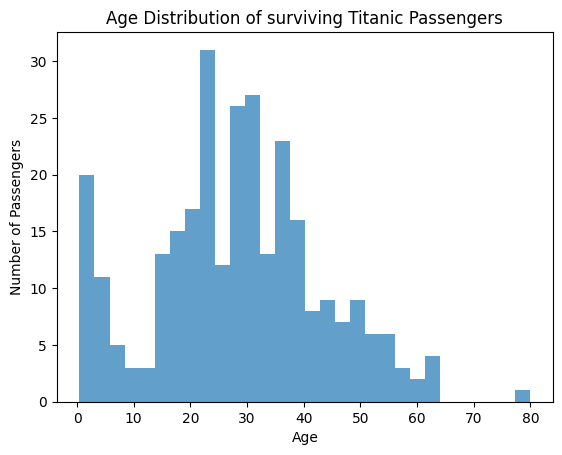

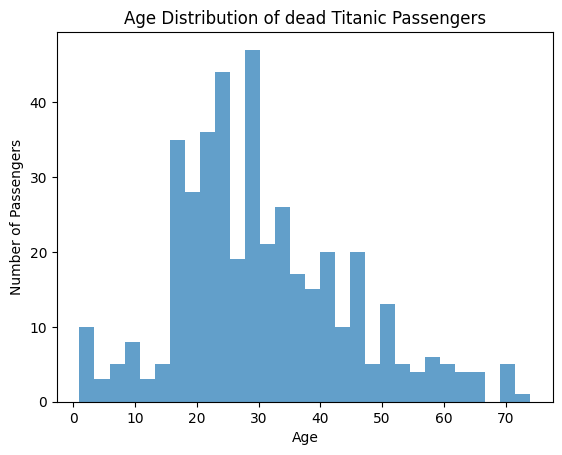

In [6]:
#Age of surviving passengers
plt.hist(df[df['Survived'] == 1]['Age'].dropna(), bins=30, alpha=0.7, label='Survived')
plt.title('Age Distribution of surviving Titanic Passengers')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.show()

#Age of non-surviving passengers
plt.hist(df[df['Survived'] == 0]['Age'].dropna(), bins=30, alpha=0.7, label='Survived')
plt.title('Age Distribution of dead Titanic Passengers')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.show()

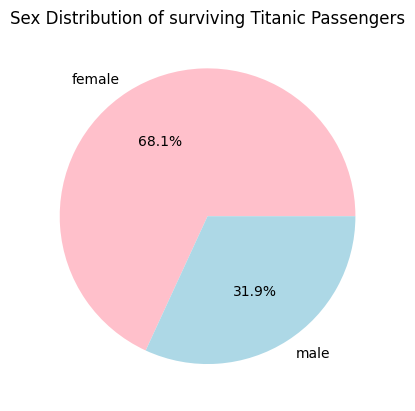

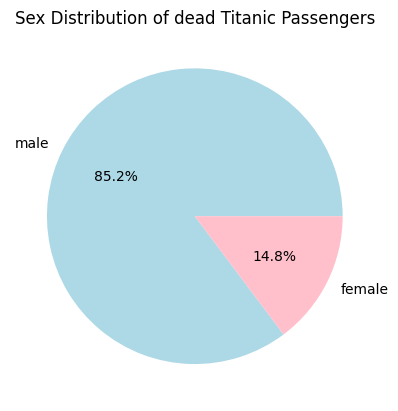

In [7]:
#Sex of surviving passengers
survived_sex_counts = df[df['Survived'] == 1]['Sex'].value_counts()
plt.pie(survived_sex_counts, labels=survived_sex_counts.index, autopct='%1.1f%%', colors=['pink', 'lightblue'])
plt.title('Sex Distribution of surviving Titanic Passengers')
plt.show()

#Sex of dead passengers
survived_sex_counts = df[df['Survived'] == 0]['Sex'].value_counts()
plt.pie(survived_sex_counts, labels=survived_sex_counts.index, autopct='%1.1f%%', colors=['lightblue', 'pink'])
plt.title('Sex Distribution of dead Titanic Passengers')
plt.show()

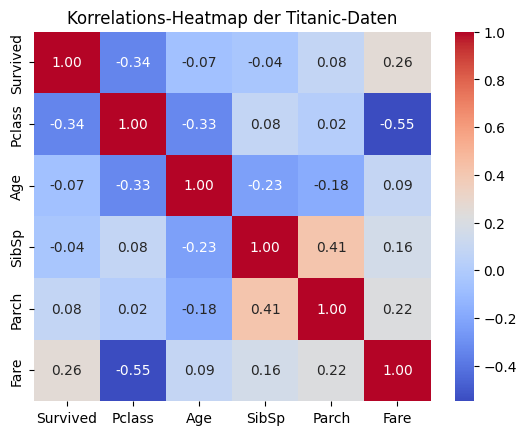

In [8]:
import seaborn as sns
numeric_df = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]

numeric_df = numeric_df.fillna(numeric_df.mean())

correlation_matrix = numeric_df.corr()


sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
)

plt.title('Korrelations-Heatmap der Titanic-Daten')
plt.show()

In [ ]:
# Erkenntnisse:
# - Jüngere Passagiere hatten eine höhere Überlebensrate
# - Frauen hatten eine deutlich höhere Überlebensrate als Männer
# - Passagiere in der ersten Klasse (Pclass 1) hatten eine höhere Überlebensrate als diejenigen in der zweiten und dritten Klasse
# - Es gibt eine positive Korrelation zwischen dem Fahrpreis (Fare) und der Überlebensrate, was darauf hindeutet, dass wohlhabendere Passagiere eher überlebten

                 Survived
Embarked Pclass          
C        1       0.694118
         2       0.529412
         3       0.378788
Q        1       0.500000
         2       0.666667
         3       0.375000
S        1       0.582677
         2       0.463415
         3       0.189802


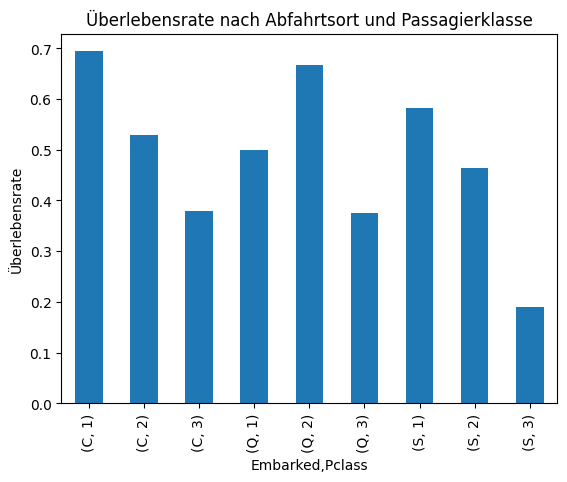

In [9]:
#Einfluss von Embarked und Pclass auf das Überleben
embarked_pclass_survival = df.pivot_table(index=['Embarked', 'Pclass'], values='Survived', aggfunc='mean')
print(embarked_pclass_survival)
embarked_pclass_survival.plot(kind='bar', legend=False)
plt.title('Überlebensrate nach Abfahrtsort und Passagierklasse')
plt.ylabel('Überlebensrate')
plt.show()



In [10]:
# Weitere Erkenntnisse:
# - Die Mehrheit der überlebenden Passagiere stammte aus der ersten Klasse
# - Passagiere die in (C) an Bord gingen hatten eine höhere Überlebensrate als (S) oder (Q)


In [11]:
#Cabin has too many missing values
#Ticket is not useful for analysis
#Name is not useful for analysis

df = df.drop(['Cabin', 'Ticket', 'Name'], axis=1)

In [12]:
#Embarked has few missing values, we can fill them with the mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [13]:
# Change Sex to numerical values
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Creates a new column for (for example Embarked_C, Embarked_Q, Embarked_S), which is either 0 or 1
df = pd.get_dummies(df, columns=['Embarked', 'Pclass'], drop_first=True)

# drop_first = True, because we know that if the passenger didnt enter in Q or S he must have entered in C

In [14]:
df

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,1,0,0,22.0,1,0,7.2500,False,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False,False
2,3,1,1,26.0,0,0,7.9250,False,True,False,True
3,4,1,1,35.0,1,0,53.1000,False,True,False,False
4,5,0,0,35.0,0,0,8.0500,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,0,27.0,0,0,13.0000,False,True,True,False
887,888,1,1,19.0,0,0,30.0000,False,True,False,False
888,889,0,1,NaN,1,2,23.4500,False,True,False,True
889,890,1,0,26.0,0,0,30.0000,False,False,False,False


In [15]:
#Goal: X (features) and y (target)
y = df['Survived']

# X excludes the target variable and PassengerId
X = df.drop(['Survived', 'PassengerId'], axis=1)

In [16]:
from sklearn.model_selection import train_test_split

# We split the data into training and test sets (80% training, 20% test)
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Trainings-Set Size: {x_train.shape[0]} Lines")
print(f"Test-Set Size: {x_test.shape[0]} Lines")

Trainings-Set Size: 712 Lines
Test-Set Size: 179 Lines


In [17]:
from sklearn import tree

In [18]:
classifier = tree.DecisionTreeClassifier()

In [19]:
classifier.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [20]:
y_pred = classifier.predict(x_test)

In [21]:
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient: {mcc}")

Matthews Correlation Coefficient: 0.48503005144049505


In [22]:
param_grid = {
    'max_depth': [3, 5, 8, 10, 15],
    'min_samples_split': [2, 5, 10, 20],
    'criterion': ['gini', 'entropy']
}

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, matthews_corrcoef, accuracy_score, f1_score

# 1. Creates a custom scorer for MCC (your target metric)
mcc_scorer = make_scorer(matthews_corrcoef)
accuracy_scorer = make_scorer(accuracy_score)
f1_scorer = make_scorer(f1_score)

# 2. Creates the GridSearchCV object
grid_search = GridSearchCV(
    estimator=classifier,
    param_grid=param_grid,
    scoring=mcc_scorer,
    cv=5,
    n_jobs=-1
)

# 3. Starts the search (Trains 5*5*4*2 = 200 models)
grid_search.fit(x_train, y_train)

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,make_scorer(m...hod='predict')
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [24]:
# Best parameterkombination
print("Best Parameters:", grid_search.best_params_)

# Best MCC-Score during the cross-validation
print("Best CV-MCC-Score:", grid_search.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}
Best CV-MCC-Score: 0.6169983451948837


In [27]:
# Final prediction with the best model
final_y_pred = grid_search.predict(x_test)

# Final MCC-Score from the test set
final_mcc = matthews_corrcoef(y_test, final_y_pred)
print(f"Final MCC on the testset: {final_mcc}")

Final MCC on the testset: 0.5809139245821947


In [28]:
final_accuracy = accuracy_score(y_test, final_y_pred)
print(f"Final Accuracy on the testset: {final_accuracy}")

f1_score = f1_score(y_test, final_y_pred)
print(f"Final F1-Score on the testset: {f1_score}")

Final Accuracy on the testset: 0.7988826815642458
Final F1-Score on the testset: 0.7391304347826086


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
classifier = RandomForestClassifier()

Final Accuracy on the testset: 0.8212290502793296


In [34]:
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
final_y_pred = y_pred
final_accuracy = matthews_corrcoef(y_test, final_y_pred)
print(f"Matthews Accuracy on the testset: {final_accuracy}")

Matthews Accuracy on the testset: 0.6291169061944221


In [36]:
from sklearn.model_selection import GridSearchCV
#GridSearchCV for tuning hyperparameters of RandomForestClassifier

In [ ]:
mcc_scorer = make_scorer(matthews_corrcoef)

param_grid_rf={
        'n_estimators': [50, 100, 200],
        'max_depth': np.arange(3, 15, 2),
        'min_samples_split': [5, 10, 15]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=param_grid_rf,
    scoring=mcc_scorer,
    cv=5, #cv = 5 times the cross validation
    n_jobs=-1
)

In [38]:
grid_search.fit(x_train, y_train)

,estimator,RandomForestClassifier()
,param_grid,"{'max_depth': [5, 10, ...], 'min_samples_split': [5, 10, ...], 'n_estimators': [50, 100, ...]}"
,scoring,make_scorer(m...hod='predict')
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [39]:
print("Best Parameters:", grid_search.best_params_)
print("Best MCC Score:", grid_search.best_score_)
final_y_pred = grid_search.predict(x_test)

final_accuracy = matthews_corrcoef(y_test, final_y_pred)
print(f"Matthews Accuracy on the testset: {final_accuracy}")

Best Parameters: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 200}
Best MCC Score: 0.6509887763721098
Matthews Accuracy on the testset: 0.6170996140606797
